In [1]:
import sys
import os
sys.path.insert(0, os.path.normpath(os.getcwd() + os.sep + os.pardir))

In [725]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, roc_auc_score, classification_report, confusion_matrix, SCORERS
from model_training import WordCountTransformer, CharacterCountTransformer, StopWordFrequency
from sklearn.neighbors import KNeighborsClassifier

stop_words = set(stopwords.words('English'))

In [253]:
answerable_data = utils.load_data('../data/aqfiltered.json', 'answerable')

<h3>T - Is it a clear question/Is there enough information for TA to understand what is happening?</h3> <br />
<h3>F - It is not a clear question, does not provide enough information, or simply asks for answer</h3> <br />
<h3>C - Anything that indicates the student is confused and cannot provide any more detail. "help explaining general thing"</h3>

In [261]:
def answerable_preprocessor(sentence):
    sentence = utils.check_quotations(sentence)
    sentence = word_tokenize(sentence)
    
    for i in range(len(sentence)):
#         sentence[i] = utils.check_camel_snakecase(sentence[i])
        sentence[i] = sentence[i].lower()
        
#         if sentence[i] in stop_words and sentence[i] not in ['who', 'what', 'when', 'where', 'why', 'how']:
#             sentence[i] = ""
#         if sentence[i].isnumeric():
#             sentence[i] = "numericnumber"
#         elif utils.is_spelled_out_number(sentence[i]):
#             sentence[i] = "nonnumericnumber"
#         elif utils.is_TA_or_instructor_name(sentence[i]):
#             sentence[i] = "name"
#         elif utils.is_error_code(sentence[i]):
#             sentence[i] = "errorcode"
#         elif utils.is_system_word(sentence[i]):
#             sentence[i] = "sys"
#         elif utils.is_function(sentence[i]):
#             sentence[i] = "func"

    return ' '.join(sentence)

In [510]:
def partition_data(data, label):
    cpy = data.copy()
    
    for i in range(len(data)):
        if data[i][1] == label:
            cpy[i][1] = 1
        else:
            cpy[i][1] = 0
    
    return cpy

In [513]:
t_data = partition_data(answerable_data, 't')
c_data = partition_data(answerable_data, 'c')
f_data = partition_data(answerable_data, 'f')

In [515]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', TfidfVectorizer(preprocessor=None)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_data[:,0], t_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_data[:,0], c_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, f_data[:,0], f_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.7355555555555554
Accuracy: 0.7713131313131312
Accuracy: 0.7217171717171718

Random Forest
Accuracy: 0.748989898989899
Accuracy: 0.7802020202020202
Accuracy: 0.7441414141414141

Naive Bayes
Accuracy: 0.7177777777777778
Accuracy: 0.7668686868686867
Accuracy: 0.712929292929293

Logistic Regression
Accuracy: 0.7310101010101009
Accuracy: 0.7668686868686867
Accuracy: 0.6994949494949494



In [516]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', TfidfVectorizer(preprocessor=answerable_preprocessor)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_data[:,0], t_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_data[:,0], c_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, f_data[:,0], f_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.7355555555555554
Accuracy: 0.7713131313131312
Accuracy: 0.7172727272727272

Random Forest
Accuracy: 0.7355555555555556
Accuracy: 0.7982828282828283
Accuracy: 0.7528282828282828

Naive Bayes
Accuracy: 0.7087878787878787
Accuracy: 0.7668686868686867
Accuracy: 0.7084848484848485

Logistic Regression
Accuracy: 0.7310101010101009
Accuracy: 0.7713131313131312
Accuracy: 0.6995959595959595



In [517]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', CountVectorizer(preprocessor=None)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_data[:,0], t_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_data[:,0], c_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, f_data[:,0], f_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.757979797979798
Accuracy: 0.7713131313131312
Accuracy: 0.7085858585858585

Random Forest
Accuracy: 0.7668686868686869
Accuracy: 0.775959595959596
Accuracy: 0.7666666666666668

Naive Bayes
Accuracy: 0.8165656565656565
Accuracy: 0.8030303030303031
Accuracy: 0.7533333333333333

Logistic Regression
Accuracy: 0.7758585858585858
Accuracy: 0.7806060606060606
Accuracy: 0.7753535353535355



In [519]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', CountVectorizer(preprocessor=answerable_preprocessor)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_data[:,0], t_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_data[:,0], c_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, f_data[:,0], f_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.757979797979798
Accuracy: 0.7713131313131312
Accuracy: 0.722121212121212

Random Forest
Accuracy: 0.7716161616161616
Accuracy: 0.7848484848484849
Accuracy: 0.7534343434343433

Naive Bayes
Accuracy: 0.8165656565656565
Accuracy: 0.7896969696969697
Accuracy: 0.7624242424242423

Logistic Regression
Accuracy: 0.775959595959596
Accuracy: 0.7761616161616162
Accuracy: 0.7576767676767676



In [557]:
t_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', CountVectorizer(preprocessor=answerable_preprocessor)),
    ])),
    ('clf', (MultinomialNB()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(t_pipeline, t_data[:,0], t_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(t_pipeline, t_data[:,0], t_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.8165656565656565
Accuracy: 0.8361398869892784


In [553]:
c_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', CountVectorizer(preprocessor=None)),
    ])),
    ('clf', (MultinomialNB()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(c_pipeline, c_data[:,0], c_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(c_pipeline, c_data[:,0], c_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.8030303030303031
Accuracy: 0.7083728036669213


In [558]:
f_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', CountVectorizer(preprocessor=None)),
    ])),
    ('clf', (LogisticRegression()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(f_pipeline, f_data[:,0], f_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(f_pipeline, f_data[:,0], f_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.7753535353535355
Accuracy: 0.8444733068916076


In [684]:
output_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('tf', PipelinePredsPredictor2(t_pipeline, 't')),
        ('cf', PipelinePredsPredictor2(c_pipeline, 'c')),
        ('tc', PipelinePredsPredictor2(f_pipeline, 'f')),
#         ('word', WordCountTransformer()),
#         ('char', CharacterCountTransformer()),
#         ('sto', StopWordFrequency(remove_stop_words))
    ])),
    ('clf', (LogisticRegression()))
])

In [685]:
print('Accuracy: {}'.format(np.mean(cross_val_score(output_pipeline, answerable_data[:,0], answerable_data[:,1], n_jobs=-1))))

Accuracy: 0.664040404040404


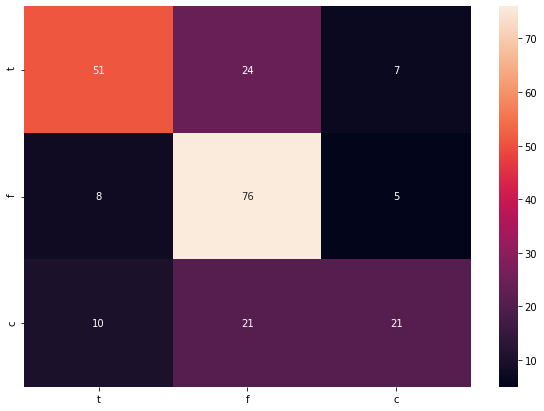

In [686]:
y_pred = cross_val_predict(output_pipeline, answerable_data[:,0], answerable_data[:,1], cv=5)
conf_mat = confusion_matrix(answerable_data[:,1], y_pred, labels=['t', 'f', 'c'])

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['t', 'f', 'c']],
                  columns = [i for i in ['t', 'f', 'c']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [262]:
t_f_data = np.array([[answerable_data[:,0][i], answerable_data[:,1][i]] for i in range(len(answerable_data)) if answerable_data[:,1][i] == 't' or answerable_data[:,1][i] == 'f'])
c_f_data = np.array([[answerable_data[:,0][i], answerable_data[:,1][i]] for i in range(len(answerable_data)) if answerable_data[:,1][i] == 'c' or answerable_data[:,1][i] == 'f'])
t_c_data = np.array([[answerable_data[:,0][i], answerable_data[:,1][i]] for i in range(len(answerable_data)) if answerable_data[:,1][i] == 't' or answerable_data[:,1][i] == 'c'])

In [709]:
t_f_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', TfidfVectorizer(preprocessor=answerable_preprocessor)),
    ])),
    ('clf', (SVC()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(t_f_pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(t_f_pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.8363025210084034
Accuracy: 0.9015426758938869


In [560]:
c_f_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', CountVectorizer(preprocessor=None)),
    ])),
    ('clf', (LogisticRegression()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(c_f_pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(c_f_pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.7660098522167488
Accuracy: 0.8353119429590018


In [561]:
t_c_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngram', CountVectorizer(preprocessor=answerable_preprocessor)),
    ])),
    ('clf', (MultinomialNB()))
])

print('Accuracy: {}'.format(np.mean(cross_val_score(t_c_pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1))))
print('Accuracy: {}'.format(np.mean(cross_val_score(t_c_pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1, scoring='roc_auc'))))

Accuracy: 0.7769230769230768
Accuracy: 0.8326737967914438


In [584]:
class PipelinePredsPredictor(BaseEstimator, TransformerMixin):
    def __init__(self, pipeline):
        self.pipeline = pipeline
    
    def transform(self, X, y=None):
        return [[item] for item in self.pipeline.predict_proba(X)[:,0]]
#         return [[self.pipeline.predict_proba(sentence)[0]] for sentence in X]
    
    def fit(self, X, y=None):
        self.pipeline.fit(X, y)
        return self

In [716]:
class PipelinePredsPredictor2(BaseEstimator, TransformerMixin):
    def __init__(self, pipeline, label):
        self.pipeline = pipeline
        self.label = label
    
    def transform(self, X, y=None):
        return [[1] if item == self.label else [0] for item in self.pipeline.predict(X)]
    
    def fit(self, X, y=None):
        self.pipeline.fit(X, y)
        return self

In [393]:
def remove_stop_words(sentence):
    sentence = utils.check_quotations(sentence)
    sentence = word_tokenize(sentence)
    
    for i in range(len(sentence)):
#         sentence[i] = utils.check_camel_snakecase(sentence[i])
        sentence[i] = sentence[i].lower()
        
        if sentence[i] in stop_words and sentence[i] not in ['who', 'what', 'when', 'where', 'why', 'how']:
            sentence[i] = ""
#         if sentence[i].isnumeric():
#             sentence[i] = "numericnumber"
#         elif utils.is_spelled_out_number(sentence[i]):
#             sentence[i] = "nonnumericnumber"
#         elif utils.is_TA_or_instructor_name(sentence[i]):
#             sentence[i] = "name"
#         elif utils.is_error_code(sentence[i]):
#             sentence[i] = "errorcode"
#         elif utils.is_system_word(sentence[i]):
#             sentence[i] = "sys"
#         elif utils.is_function(sentence[i]):
#             sentence[i] = "func"

    return ' '.join(sentence)

In [731]:
output_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('tf', PipelinePredsPredictor2(t_f_pipeline, 't')),
        ('cf', PipelinePredsPredictor(c_f_pipeline)),
        ('tc', PipelinePredsPredictor(t_c_pipeline)),
#         ('word', WordCountTransformer()),
#         ('char', CharacterCountTransformer()),
#         ('sto', StopWordFrequency(remove_stop_words))
    ])),
    ('clf', (SVC(kernel='rbf')))
])

In [732]:
print('Accuracy: {}'.format(np.mean(cross_val_score(output_pipeline, answerable_data[:,0], answerable_data[:,1], n_jobs=-1))))

Accuracy: 0.7222222222222221


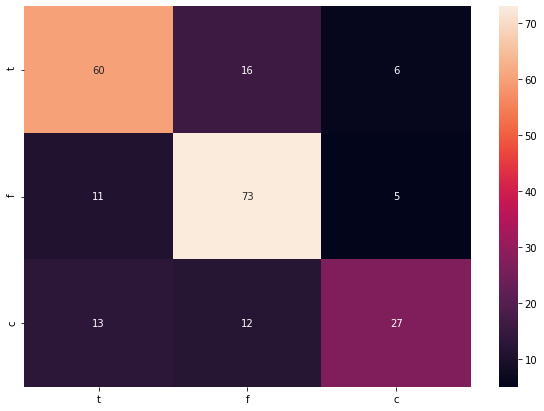

In [723]:
y_pred = cross_val_predict(output_pipeline, answerable_data[:,0], answerable_data[:,1], cv=5)
conf_mat = confusion_matrix(answerable_data[:,1], y_pred, labels=['t', 'f', 'c'])

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['t', 'f', 'c']],
                  columns = [i for i in ['t', 'f', 'c']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [726]:
print(classification_report(answerable_data[:,1], y_pred))

              precision    recall  f1-score   support

           c       0.71      0.52      0.60        52
           f       0.72      0.82      0.77        89
           t       0.71      0.73      0.72        82

    accuracy                           0.72       223
   macro avg       0.72      0.69      0.70       223
weighted avg       0.72      0.72      0.71       223



In [719]:
output_pipeline.fit(answerable_data[:,0], answerable_data[:,1])

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('tf',
                                                 PipelinePredsPredictor2(label='t',
                                                                         pipeline=Pipeline(memory=None,
                                                                                           steps=[('features',
                                                                                                   FeatureUnion(n_jobs=None,
                                                                                                                transformer_list=[('ngram',
                                                                                                                                   TfidfVectorizer(analyzer='word',
                                                                                                                           

In [720]:
output_pipeline.predict(["I'm extremely confused with what's going on with the seg fault"])

array(['c'], dtype='<U517')

In [514]:
models = {'SVM': SVC(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': MultinomialNB(), 'Logistic Regression': LogisticRegression()}

In [284]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', TfidfVectorizer(preprocessor=None)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1))))
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.6943019943019942

Random Forest
Accuracy: 0.7396011396011397

Naive Bayes
Accuracy: 0.7014245014245015

Logistic Regression
Accuracy: 0.7085470085470085



In [285]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', TfidfVectorizer(preprocessor=answerable_preprocessor)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1))))
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.7017094017094017

Random Forest
Accuracy: 0.7692307692307692

Naive Bayes
Accuracy: 0.7242165242165242

Logistic Regression
Accuracy: 0.7091168091168092



In [286]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', CountVectorizer(preprocessor=None)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1))))
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.7091168091168092

Random Forest
Accuracy: 0.7544159544159543

Naive Bayes
Accuracy: 0.7695156695156695

Logistic Regression
Accuracy: 0.7618233618233619



In [287]:
for model in models:
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('ngram', CountVectorizer(preprocessor=answerable_preprocessor)),
        ])),
        ('clf', (models[model]))
    ])
    
    print(model)
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_f_data[:,0], t_f_data[:,1], n_jobs=-1))))
#     print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, c_f_data[:,0], c_f_data[:,1], n_jobs=-1))))
    print('Accuracy: {}'.format(np.mean(cross_val_score(pipeline, t_c_data[:,0], t_c_data[:,1], n_jobs=-1))))
    print()

SVM
Accuracy: 0.6943019943019944

Random Forest
Accuracy: 0.7615384615384615

Naive Bayes
Accuracy: 0.7769230769230768

Logistic Regression
Accuracy: 0.7621082621082621

